#### Performing exploratory data analysis on a single file of Google Cyclistic project.

In [55]:
import pandas as pd

In [56]:
df = pd.read_csv('202004-divvy-tripdata.csv')
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84776 entries, 0 to 84775
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             84776 non-null  object 
 1   rideable_type       84776 non-null  object 
 2   started_at          84776 non-null  object 
 3   ended_at            84776 non-null  object 
 4   start_station_name  84776 non-null  object 
 5   start_station_id    84776 non-null  int64  
 6   end_station_name    84677 non-null  object 
 7   end_station_id      84677 non-null  float64
 8   start_lat           84776 non-null  float64
 9   start_lng           84776 non-null  float64
 10  end_lat             84677 non-null  float64
 11  end_lng             84677 non-null  float64
 12  member_casual       84776 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 8.4+ MB


In [58]:
#changing the starting and ending times column data type to date time

df['started_at'] = df['started_at'].astype('datetime64')
df['ended_at'] = df['ended_at'].astype('datetime64')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84776 entries, 0 to 84775
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ride_id             84776 non-null  object        
 1   rideable_type       84776 non-null  object        
 2   started_at          84776 non-null  datetime64[ns]
 3   ended_at            84776 non-null  datetime64[ns]
 4   start_station_name  84776 non-null  object        
 5   start_station_id    84776 non-null  int64         
 6   end_station_name    84677 non-null  object        
 7   end_station_id      84677 non-null  float64       
 8   start_lat           84776 non-null  float64       
 9   start_lng           84776 non-null  float64       
 10  end_lat             84677 non-null  float64       
 11  end_lng             84677 non-null  float64       
 12  member_casual       84776 non-null  object        
dtypes: datetime64[ns](2), float64(5), int64(1), ob

In [59]:
#deleting unnecessary columns
df = df.drop(['ride_id','start_lat','start_lng','end_lat','end_lng','start_station_id','end_station_id'],axis=1)
df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual
0,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,Lincoln Ave & Diversey Pkwy,member
1,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,Kosciuszko Park,member
2,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,Indiana Ave & Roosevelt Rd,member
3,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,Wood St & Augusta Blvd,member
4,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,Sheridan Rd & Lawrence Ave,casual


In [60]:
#adding a ride_length column. research how to set its position
df['ride_length'] = (df['ended_at'] - df['started_at'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84776 entries, 0 to 84775
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   rideable_type       84776 non-null  object         
 1   started_at          84776 non-null  datetime64[ns] 
 2   ended_at            84776 non-null  datetime64[ns] 
 3   start_station_name  84776 non-null  object         
 4   end_station_name    84677 non-null  object         
 5   member_casual       84776 non-null  object         
 6   ride_length         84776 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), object(4), timedelta64[ns](1)
memory usage: 4.5+ MB


,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,ride_length
0,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,Lincoln Ave & Diversey Pkwy,member,0 days 00:26:49
1,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,Kosciuszko Park,member,0 days 00:08:09
2,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,Indiana Ave & Roosevelt Rd,member,0 days 00:14:23
3,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,Wood St & Augusta Blvd,member,0 days 00:12:12
4,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,Sheridan Rd & Lawrence Ave,casual,0 days 00:52:55


In [62]:
df.groupby(['member_casual']).count()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,ride_length
member_casual,,,,,,
casual,23628,23628,23628,23628,23588,23628
member,61148,61148,61148,61148,61089,61148


In [63]:
#seperating members and casual in different dfs
df1 = df.loc[(df['member_casual'] == 'member')]
df1

,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,ride_length
0,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,Lincoln Ave & Diversey Pkwy,member,0 days 00:26:49
1,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,Kosciuszko Park,member,0 days 00:08:09
2,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,Indiana Ave & Roosevelt Rd,member,0 days 00:14:23
3,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,Wood St & Augusta Blvd,member,0 days 00:12:12
5,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,member,0 days 00:05:24
...,...,...,...,...,...,...,...
84767,docked_bike,2020-04-12 14:49:38,2020-04-12 14:57:40,Clark St & North Ave,State St & Pearson St,member,0 days 00:08:02
84768,docked_bike,2020-04-12 14:07:59,2020-04-12 14:43:28,Lake Shore Dr & North Blvd,Clark St & Lincoln Ave,member,0 days 00:35:29
84769,docked_bike,2020-04-12 14:07:40,2020-04-12 14:07:48,Lake Shore Dr & North Blvd,Lake Shore Dr & North Blvd,member,0 days 00:00:08
84770,docked_bike,2020-04-12 12:14:10,2020-04-12 12:21:15,State St & Pearson St,Lake Shore Dr & North Blvd,member,0 days 00:07:05


##### Performing operations and analysis on Annual Members

In [54]:
df1.loc[(df1['start_station_name'].str.contains('Eckhart Park'))]

,started_at,ended_at,start_station_name,end_station_name,member_casual,ride_length
0,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,Lincoln Ave & Diversey Pkwy,member,0 days 00:26:49
272,2020-04-20 17:35:13,2020-04-20 17:38:57,Eckhart Park,Noble St & Milwaukee Ave,member,0 days 00:03:44
2565,2020-04-23 13:26:43,2020-04-23 13:43:32,Eckhart Park,Damen Ave & Chicago Ave,member,0 days 00:16:49
2566,2020-04-30 19:20:44,2020-04-30 19:39:35,Eckhart Park,Damen Ave & Chicago Ave,member,0 days 00:18:51
5491,2020-04-11 10:39:28,2020-04-11 11:00:05,Eckhart Park,Sedgwick St & Webster Ave,member,0 days 00:20:37
...,...,...,...,...,...,...
75465,2020-04-25 18:33:18,2020-04-25 18:36:41,Eckhart Park,Ogden Ave & Chicago Ave,member,0 days 00:03:23
76360,2020-04-08 21:20:41,2020-04-08 21:23:09,Eckhart Park,Ogden Ave & Chicago Ave,member,0 days 00:02:28
78326,2020-04-11 15:31:21,2020-04-11 15:45:54,Eckhart Park,Green St & Madison St,member,0 days 00:14:33
78378,2020-04-20 17:32:28,2020-04-20 18:38:54,Eckhart Park,Eckhart Park,member,0 days 01:06:26


In [256]:
#finding which stations were the most commonly used for starting and for ending
#df1['count'] = 1
df2 = df1.groupby(['start_station_name']).count()['count']
df2

start_station_name
2112 W Peterson Ave              29
63rd St Beach                    33
900 W Harrison St                98
Aberdeen St & Jackson Blvd      229
Aberdeen St & Monroe St         145
                               ... 
Wood St & Taylor St             225
Woodlawn Ave & 55th St           38
Woodlawn Ave & 75th St            4
Woodlawn Ave & Lake Park Ave     62
Yates Blvd & 75th St              4
Name: count, Length: 586, dtype: int64

Lets make a histogram to find the lay of the numbers.

In [147]:
import matplotlib.pyplot as plt

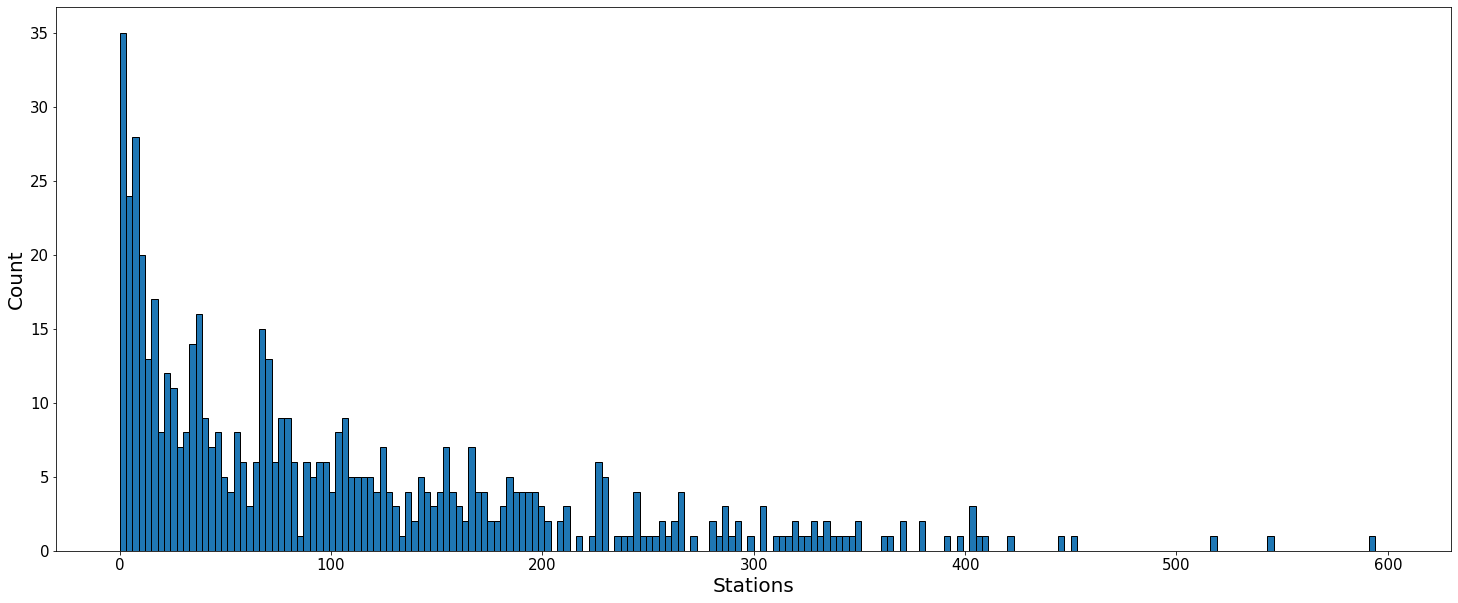

In [206]:
plt.figure(figsize = (25,10))
binlist =  range(0,601,3)
plt.hist(df2, bins = binlist, edgecolor = 'black');
plt.xlabel('Stations', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);

This figure shows us the number of rides started by annual members on different stations. On x-axis are the stations starting from one ride from one station to going over six hundred rides for the highest station. On y-axis shows the number of stations for which the corresponding number of rides were started.So there are almost 35 stations where the number of rides started is less than or equal to 3.

Now we will isolate the fifteen busiest stations.

In [177]:
df2.iloc[:15]

start_station_name
Clark St & Elm St                604
St. Clair St & Erie St           593
Dearborn St & Erie St            545
Desplaines St & Kinzie St        516
Clark St & Armitage Ave          451
Broadway & Barry Ave             444
Stockton Dr & Wrightwood Ave     420
Wabash Ave & Grand Ave           408
Clark St & Schiller St           407
Larrabee St & Webster Ave        404
Columbus Dr & Randolph St        404
Wells St & Concord Ln            402
Kingsbury St & Erie St           398
Wabash Ave & Roosevelt Rd        390
Pine Grove Ave & Waveland Ave    379
Name: count, dtype: int64

We need to pull the numbers of these stations from df1. Actually we only need the ride_length column and we can add a count column for convenience. These stations account for roughly 10% of the total rides started.

In [247]:
df01 = df1.loc[(df1['start_station_name'].str.contains('Clark St & Elm St'))]
df01

,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,ride_length,count
120,docked_bike,2020-04-01 15:23:48,2020-04-01 15:35:22,Clark St & Elm St,Wood St & Milwaukee Ave,member,0 days 00:11:34,1
480,docked_bike,2020-04-24 22:11:34,2020-04-24 22:18:07,Clark St & Elm St,Wells St & Hubbard St,member,0 days 00:06:33,1
601,docked_bike,2020-04-20 21:26:16,2020-04-20 21:45:38,Clark St & Elm St,Clark St & Elm St,member,0 days 00:19:22,1
628,docked_bike,2020-04-23 16:55:01,2020-04-23 17:09:40,Clark St & Elm St,LaSalle Dr & Huron St,member,0 days 00:14:39,1
631,docked_bike,2020-04-26 20:01:37,2020-04-26 20:33:13,Clark St & Elm St,State St & Randolph St,member,0 days 00:31:36,1
...,...,...,...,...,...,...,...,...
84060,docked_bike,2020-04-19 12:19:04,2020-04-19 12:30:41,Clark St & Elm St,Halsted St & Dickens Ave,member,0 days 00:11:37,1
84344,docked_bike,2020-04-30 17:26:27,2020-04-30 17:53:52,Clark St & Elm St,Lincoln Ave & Belmont Ave,member,0 days 00:27:25,1
84557,docked_bike,2020-04-04 18:54:13,2020-04-04 18:57:00,Clark St & Elm St,Dearborn Pkwy & Delaware Pl,member,0 days 00:02:47,1
84632,docked_bike,2020-04-26 17:01:07,2020-04-26 17:32:56,Clark St & Elm St,LaSalle Dr & Huron St,member,0 days 00:31:49,1


Lets analyze the same for end stations.

In [199]:
df4 = df1.groupby(['end_station_name']).count()['count']
df4 = df4.sort_values(ascending = False)
df4

end_station_name
Clark St & Elm St               675
St. Clair St & Erie St          616
Dearborn St & Erie St           587
Broadway & Barry Ave            511
Desplaines St & Kinzie St       508
                               ... 
MLK Jr Dr & 83rd St               1
Halsted St & 59th St              1
Halsted St & 56th St              1
Fairfield Ave & Roosevelt Rd      1
Kostner Ave & Lake St             1
Name: count, Length: 582, dtype: int64

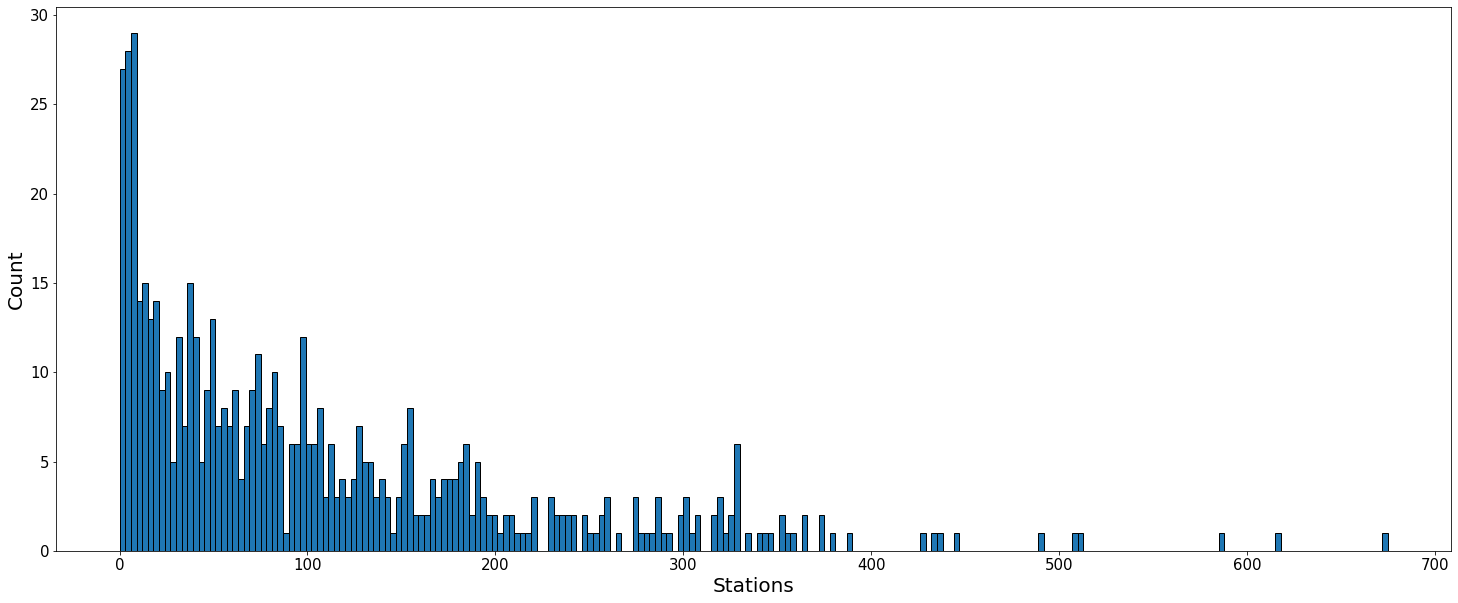

In [201]:
plt.figure(figsize = (25,10))
binlist =  range(0,676,3)
plt.hist(df4, bins = binlist, edgecolor = 'black');
plt.xlabel('Stations', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);

In [202]:
df4.iloc[:15]

end_station_name
Clark St & Elm St                675
St. Clair St & Erie St           616
Dearborn St & Erie St            587
Broadway & Barry Ave             511
Desplaines St & Kinzie St        508
Wabash Ave & Roosevelt Rd        489
Larrabee St & Webster Ave        446
Wells St & Concord Ln            435
Clark St & Armitage Ave          432
Wabash Ave & Grand Ave           427
Kingsbury St & Erie St           388
Green St & Madison St            380
Indiana Ave & Roosevelt Rd       373
Dearborn Pkwy & Delaware Pl      373
Pine Grove Ave & Waveland Ave    363
Name: count, dtype: int64

In [207]:
df01

,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,ride_length,count
120,docked_bike,2020-04-01 15:23:48,2020-04-01 15:35:22,Clark St & Elm St,Wood St & Milwaukee Ave,member,0 days 00:11:34,1
480,docked_bike,2020-04-24 22:11:34,2020-04-24 22:18:07,Clark St & Elm St,Wells St & Hubbard St,member,0 days 00:06:33,1
601,docked_bike,2020-04-20 21:26:16,2020-04-20 21:45:38,Clark St & Elm St,Clark St & Elm St,member,0 days 00:19:22,1
628,docked_bike,2020-04-23 16:55:01,2020-04-23 17:09:40,Clark St & Elm St,LaSalle Dr & Huron St,member,0 days 00:14:39,1
631,docked_bike,2020-04-26 20:01:37,2020-04-26 20:33:13,Clark St & Elm St,State St & Randolph St,member,0 days 00:31:36,1
...,...,...,...,...,...,...,...,...
84060,docked_bike,2020-04-19 12:19:04,2020-04-19 12:30:41,Clark St & Elm St,Halsted St & Dickens Ave,member,0 days 00:11:37,1
84344,docked_bike,2020-04-30 17:26:27,2020-04-30 17:53:52,Clark St & Elm St,Lincoln Ave & Belmont Ave,member,0 days 00:27:25,1
84557,docked_bike,2020-04-04 18:54:13,2020-04-04 18:57:00,Clark St & Elm St,Dearborn Pkwy & Delaware Pl,member,0 days 00:02:47,1
84632,docked_bike,2020-04-26 17:01:07,2020-04-26 17:32:56,Clark St & Elm St,LaSalle Dr & Huron St,member,0 days 00:31:49,1


In [249]:
df01 = df01.drop(['rideable_type','started_at','ended_at','member_casual'], axis = 1)
df01

,start_station_name,end_station_name,ride_length,count
73587,Clark St & Elm St,Ritchie Ct & Banks St,0 days 01:48:59,1
8430,Clark St & Elm St,Ritchie Ct & Banks St,0 days 01:48:45,1
52716,Clark St & Elm St,Sheffield Ave & Waveland Ave,0 days 01:33:15,1
16289,Clark St & Elm St,Sedgwick St & Huron St,0 days 01:27:53,1
75235,Clark St & Elm St,Milwaukee Ave & Grand Ave,0 days 01:22:47,1
...,...,...,...,...
83347,Clark St & Elm St,Clark St & Elm St,0 days 00:00:06,1
54278,Clark St & Elm St,Clark St & Elm St,0 days 00:00:04,1
7631,Clark St & Elm St,Clark St & Elm St,0 days 00:00:04,1
67466,Clark St & Elm St,Clark St & Armitage Ave,0 days 00:00:00,1


In [250]:
df01 = df01.sort_values(['ride_length'], ascending = False)
df01

,start_station_name,end_station_name,ride_length,count
73587,Clark St & Elm St,Ritchie Ct & Banks St,0 days 01:48:59,1
8430,Clark St & Elm St,Ritchie Ct & Banks St,0 days 01:48:45,1
52716,Clark St & Elm St,Sheffield Ave & Waveland Ave,0 days 01:33:15,1
16289,Clark St & Elm St,Sedgwick St & Huron St,0 days 01:27:53,1
75235,Clark St & Elm St,Milwaukee Ave & Grand Ave,0 days 01:22:47,1
...,...,...,...,...
83347,Clark St & Elm St,Clark St & Elm St,0 days 00:00:06,1
54278,Clark St & Elm St,Clark St & Elm St,0 days 00:00:04,1
7631,Clark St & Elm St,Clark St & Elm St,0 days 00:00:04,1
67466,Clark St & Elm St,Clark St & Armitage Ave,0 days 00:00:00,1


In [251]:
#deleting rows with faulty ride length durations.
df01 = df01[:-1]
df01

,start_station_name,end_station_name,ride_length,count
73587,Clark St & Elm St,Ritchie Ct & Banks St,0 days 01:48:59,1
8430,Clark St & Elm St,Ritchie Ct & Banks St,0 days 01:48:45,1
52716,Clark St & Elm St,Sheffield Ave & Waveland Ave,0 days 01:33:15,1
16289,Clark St & Elm St,Sedgwick St & Huron St,0 days 01:27:53,1
75235,Clark St & Elm St,Milwaukee Ave & Grand Ave,0 days 01:22:47,1
...,...,...,...,...
17272,Clark St & Elm St,Clark St & Elm St,0 days 00:00:17,1
83347,Clark St & Elm St,Clark St & Elm St,0 days 00:00:06,1
54278,Clark St & Elm St,Clark St & Elm St,0 days 00:00:04,1
7631,Clark St & Elm St,Clark St & Elm St,0 days 00:00:04,1


In [252]:
#converting ride length into seconds from days:hours:minutes:seconds
df01['ride_length'] = df01['ride_length'] / np.timedelta64(1, 's')
df01

<ipython-input-252-5ea745d18108>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df01['ride_length'] = df01['ride_length'] / np.timedelta64(1, 's')


,start_station_name,end_station_name,ride_length,count
73587,Clark St & Elm St,Ritchie Ct & Banks St,6539.0,1
8430,Clark St & Elm St,Ritchie Ct & Banks St,6525.0,1
52716,Clark St & Elm St,Sheffield Ave & Waveland Ave,5595.0,1
16289,Clark St & Elm St,Sedgwick St & Huron St,5273.0,1
75235,Clark St & Elm St,Milwaukee Ave & Grand Ave,4967.0,1
...,...,...,...,...
17272,Clark St & Elm St,Clark St & Elm St,17.0,1
83347,Clark St & Elm St,Clark St & Elm St,6.0,1
54278,Clark St & Elm St,Clark St & Elm St,4.0,1
7631,Clark St & Elm St,Clark St & Elm St,4.0,1
